In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 32EA-CE9F

 Directory of C:\Users\HP\Music\tech resume projects\Electric fault detection

11-04-2025  12:26    <DIR>          .
10-04-2025  12:33    <DIR>          ..
11-04-2025  12:26    <DIR>          .ipynb_checkpoints
10-04-2025  12:25           655,029 classData.csv
10-04-2025  22:52           103,282 Untitled.ipynb
11-04-2025  12:26               337 Untitled1.ipynb
               3 File(s)        758,648 bytes
               3 Dir(s)  205,662,453,760 bytes free


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [6]:
data=pd.read_csv("classData.csv")

In [10]:
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [20]:
def addingcol(row):
    a,b,c,g=row["A"],row["B"],row["C"],row["G"]
    sum=b+c+a
    if ((g==1) and (sum==1)):
        return "LG fault"
    elif ((g==1) and (sum==2)):
        return "LLG fault"
    elif ((g==0) and (sum==0)):
        return "No fault"
    elif ((g==0) and (sum==2)):
        return "LL fault"
    elif ((g==0) and (sum==3)):
        return "LLL fault"
    elif ((g==1) and (sum==3)):
        return "LLLG fault"
    else:
        return "error"

In [22]:
data["Fault_type"]=data.apply(addingcol,axis=1)

In [24]:
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,LG fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,LG fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,LG fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,LG fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,LG fault


In [26]:
data["Fault_type"].value_counts()

Fault_type
No fault      2365
LLG fault     1134
LLLG fault    1133
LG fault      1129
LLL fault     1096
LL fault      1004
Name: count, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   G           7861 non-null   int64  
 1   C           7861 non-null   int64  
 2   B           7861 non-null   int64  
 3   A           7861 non-null   int64  
 4   Ia          7861 non-null   float64
 5   Ib          7861 non-null   float64
 6   Ic          7861 non-null   float64
 7   Va          7861 non-null   float64
 8   Vb          7861 non-null   float64
 9   Vc          7861 non-null   float64
 10  Fault_type  7861 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 675.7+ KB


In [34]:
data.drop(columns={"A","B","C","G"},inplace=True)

In [38]:
data.tail()

,Ia,Ib,Ic,Va,Vb,Vc,Fault_type
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,No fault
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,No fault
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,No fault
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,No fault
7860,-64.598401,34.480799,27.250065,0.131669,-0.563835,0.432166,No fault


In [42]:
data.isna().sum()
# no null value

Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
Fault_type    0
dtype: int64

In [44]:
data.describe()

,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


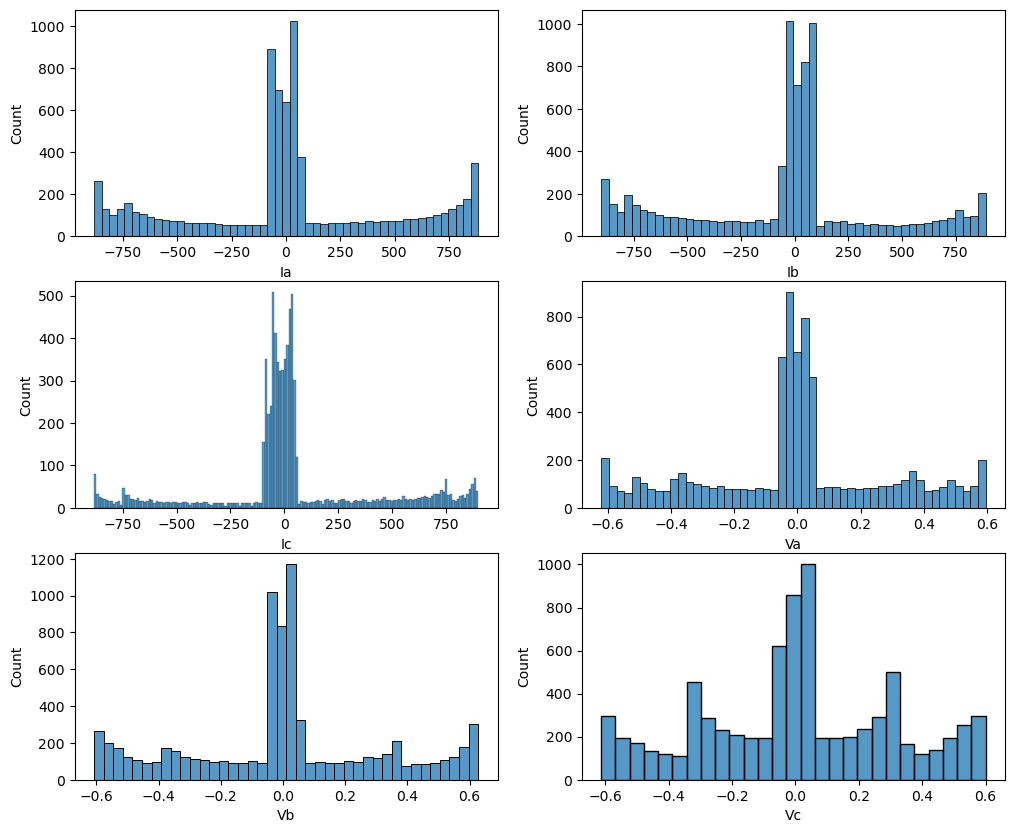

In [66]:
cnt=1
plt.figure(figsize=(12,10))
for i in data.drop(columns="Fault_type").columns:
    plt.subplot(3,2,cnt)
    sns.histplot(data[i])
    cnt+=1
    # plt.xlabel(i)

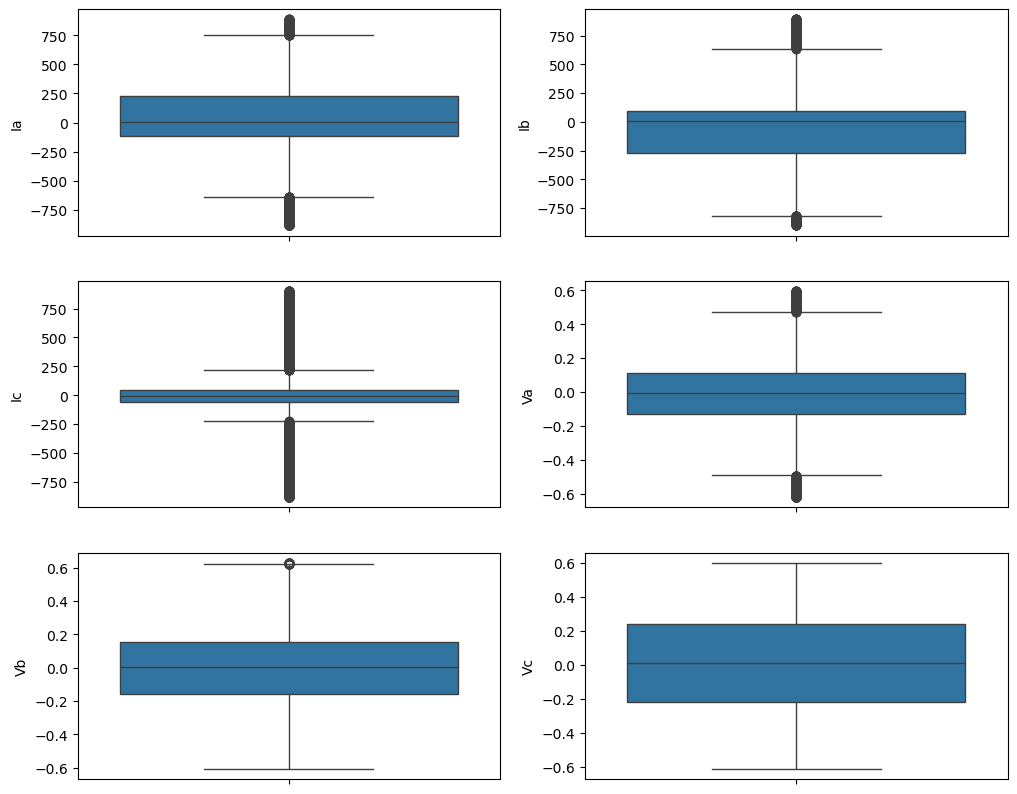

In [68]:
cnt=1
plt.figure(figsize=(12,10))
for i in data.drop(columns="Fault_type").columns:
    plt.subplot(3,2,cnt)
    sns.boxplot(data[i])
    cnt+=1
    # plt.xlabel(i)

<Axes: xlabel='Fault_type', ylabel='count'>

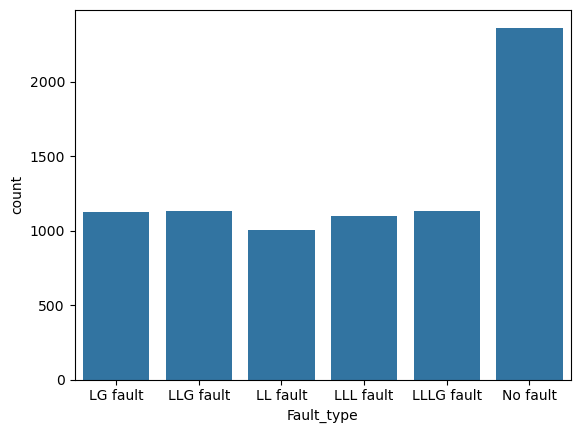

In [72]:
sns.countplot(data=data,x="Fault_type")

In [80]:
# for encoding and scaling

from sklearn.preprocessing import LabelEncoder,StandardScaler

In [82]:
feature=data.drop(columns="Fault_type")
target=data["Fault_type"]

In [89]:
encoder=LabelEncoder()
Y_encoded=encoder.fit_transform(target)

In [111]:
encoder.classes_

array(['LG fault', 'LL fault', 'LLG fault', 'LLL fault', 'LLLG fault',
       'No fault'], dtype=object)

In [113]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(feature)

In [122]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y_encoded,test_size=0.2,random_state=42,stratify=Y_encoded)

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [130]:
model=Sequential([
    Dense(64,activation="relu",input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64,activation="relu"),
    Dropout(0.3),
    Dense(6,activation="softmax")
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [156]:
history=model.fit(X_train,Y_train,epochs=50,validation_split=0.2,verbose=1,batch_size=32)

Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8448 - loss: 0.2524 - val_accuracy: 0.8672 - val_loss: 0.2111
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8430 - loss: 0.2522 - val_accuracy: 0.8601 - val_loss: 0.2100
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8591 - loss: 0.2423 - val_accuracy: 0.8577 - val_loss: 0.2074
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8565 - loss: 0.2379 - val_accuracy: 0.8680 - val_loss: 0.2111
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8485 - loss: 0.2462 - val_accuracy: 0.8688 - val_loss: 0.2060
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8533 - loss: 0.2417 - val_accuracy: 0.8672 - val_loss: 0.2036
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8539 - loss: 0.2370 - val_accuracy: 0.8704 - val_loss: 0.2040
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8562 - loss: 0.2281 - val_accuracy: 0.

In [168]:
loss_val,accuracy_val=model.evaluate(X_test,Y_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 0.1904


In [178]:
print("model has accuracy of ",float(str(accuracy_val*100)[:6]),"% and loss is ", str(loss_val)[:5])

model has accuracy of  86.331 % and loss is  0.206


In [182]:
history_df=pd.DataFrame(history.history)

In [192]:
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.847714,0.246934,0.867250,0.211120
1,0.847913,0.247652,0.860095,0.209992
2,0.848509,0.242550,0.857711,0.207435
3,0.848310,0.246218,0.868044,0.211136
4,0.852883,0.244242,0.868839,0.205965


Text(0, 0.5, 'Accuracy')

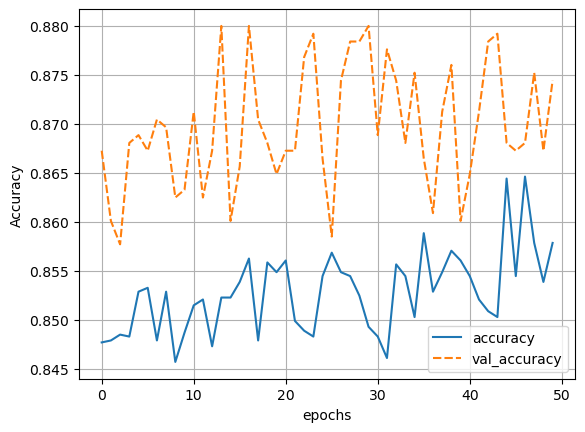

In [206]:
sns.lineplot(history_df[["accuracy","val_accuracy"]])
plt.grid()
plt.xlabel("epochs")
plt.ylabel("Accuracy")
# plt.tight_layout()

Text(0, 0.5, 'loss')

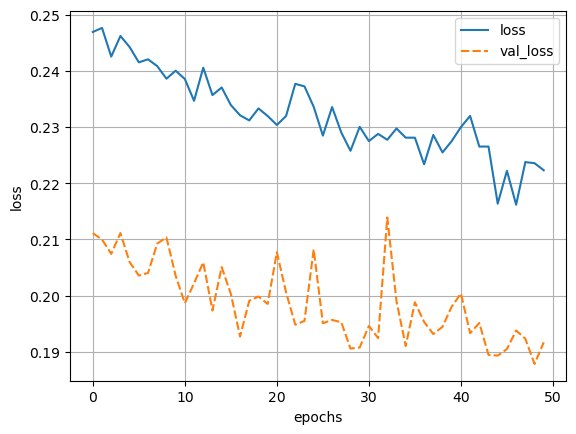

In [208]:
sns.lineplot(history_df[["loss","val_loss"]])
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
# plt.tight_layout()

In [210]:
Y_pred_prob=model.predict(X_test)
Y_pred=Y_pred_prob.argmax(axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [244]:
from sklearn.metrics import confusion_matrix,classification_report

In [214]:
confusion_matrix(Y_pred,Y_test)

array([[226,   0,   6,   0,   0,   0],
       [  0, 199,   0,   1,   1,   1],
       [  0,   0, 221,   1,   0,   0],
       [  0,   0,   0,  17,   3,   0],
       [  0,   1,   0, 200, 223,   0],
       [  0,   1,   0,   0,   0, 472]], dtype=int64)

<Axes: >

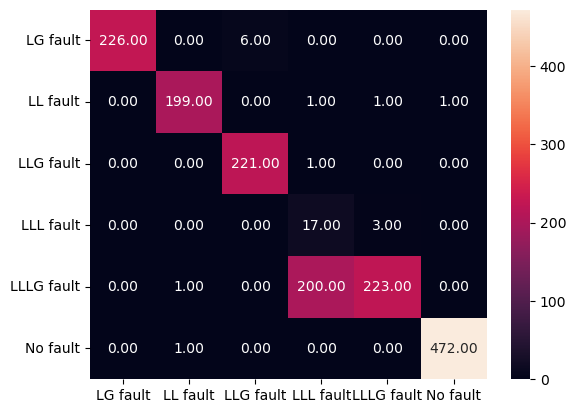

In [252]:
# plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(Y_pred,Y_test),annot=True,fmt=".2f",xticklabels=encoder.classes_,yticklabels=encoder.classes_)
# plt.xticks(rotation=90)

In [250]:
print(classification_report(Y_test,Y_pred,target_names=encoder.classes_))

              precision    recall  f1-score   support

    LG fault       0.97      1.00      0.99       226
    LL fault       0.99      0.99      0.99       201
   LLG fault       1.00      0.97      0.98       227
   LLL fault       0.85      0.08      0.14       219
  LLLG fault       0.53      0.98      0.69       227
    No fault       1.00      1.00      1.00       473

    accuracy                           0.86      1573
   macro avg       0.89      0.84      0.80      1573
weighted avg       0.90      0.86      0.83      1573

